In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.calibration import CalibrationDisplay
from comet_ml import Experiment
import os

np.random.seed(42)

In [2]:
comet_project_name="hockery-primer-t14"
comet_workspace="amandalmia"

In [3]:
def build_random_model(data):
    filter_df = data[['angle', 'is_goal']]
    filter_df = filter_df.dropna()
    
    df_x = filter_df["angle"].values
    df_y = filter_df["is_goal"].values

    x_train, x_val, y_train, y_val = train_test_split(df_x, df_y, test_size=0.2, stratify=df_y, 
                                                          random_state=42)
    x_train = x_train.reshape(-1, 1)
    x_val = x_val.reshape(-1, 1)
    
    y_pred = np.array([np.random.uniform(low=0.0, high=1.0) for i in range(y_val.shape[0])])
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = 0
    
    accuracy = np.mean(y_val == y_pred) * 100
    print("correctly predicted / total is ", accuracy)
    print(classification_report(y_val, y_pred))
    
    
data = pd.read_csv("../data/trainvaldata/train_set.csv")
build_random_model(data)

correctly predicted / total is  50.17038533298383
              precision    recall  f1-score   support

           0       0.91      0.50      0.65     58925
           1       0.09      0.51      0.16      5928

    accuracy                           0.50     64853
   macro avg       0.50      0.51      0.40     64853
weighted avg       0.84      0.50      0.60     64853



## Question 1

Evaluate the accuracy (i.e. correctly predicted / total) of your model on the validation set. What do you notice? Look at the predictions and discuss your findings. What could be a potential issue? Include these discussions in your blog post.

- Allthough the accuracy is showing up 90% of accuracy, but this number isn't right in my opion. As the major class is 0s, and the ratio of trainign data of shot being goal and not-goal is highly imbalance and is in the order of 1:10. 
- From the classificatinon report its clear that all the test data (validation data) has been predicted to 0s as the output. 


## Question 2
Receiver Operating Characteristic (ROC) curves and the AUC metric of the ROC curve. Include a random classifier baseline, i.e. each shot has a 50% chance of being a goal.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.498


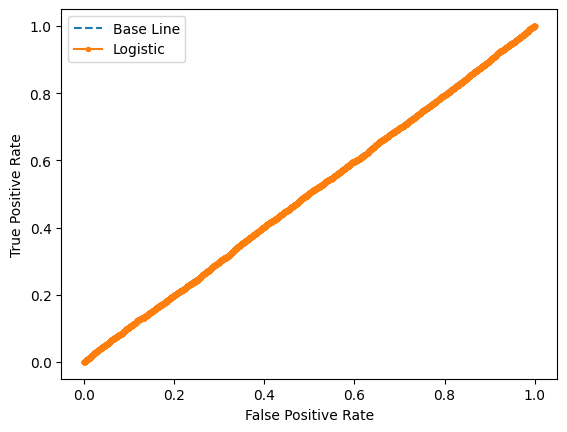

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/amandalmia/hockery-primer-t14/83493110193a4626b1f9d6e62e937555

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it


COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor va

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor va

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 1.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING: Invalid y_predictor value 0.0, ignoring it
COMET WARNING:

In [4]:
def create_roc_auc_curve(data):
    filter_df = data[['angle', 'is_goal']]
    filter_df = filter_df.dropna()
    
    df_x = filter_df["angle"].values
    df_y = filter_df["is_goal"].values

    x_train, x_val, y_train, y_val = train_test_split(df_x, df_y, test_size=0.2, stratify=df_y, 
                                                          random_state=42)
    x_train = x_train.reshape(-1, 1)
    x_val = x_val.reshape(-1, 1)
    testy = y_val
    ns_probs = [0 for _ in range(len(testy))]
    
    goal_prob = np.array([np.random.uniform(low=0.0, high=1.0) for i in range(x_val.shape[0])])
    
    y_pred = np.array([np.random.uniform(low=0.0, high=1.0) for i in range(y_val.shape[0])])
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = 0
    
    accuracy = np.mean(y_val == y_pred) * 100
    
    # calculate scores
    ns_auc = roc_auc_score(testy, ns_probs)
    lr_auc = roc_auc_score(testy, goal_prob)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(testy, goal_prob)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Base Line')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    
    metrics = {"roc" : lr_auc, "accuracy":accuracy }
    exp = Experiment(
    api_key=os.environ.get('COMET_API_KEY'),
    project_name=comet_project_name,
    workspace=comet_workspace,
    log_code=True
    )
    exp.log_metrics(metrics)
    exp.log_dataset_hash(x_train)
    exp.set_name(name="Random Baseline Model")
    exp.log_confusion_matrix(y_true=y_val, y_predicted=y_pred)
    exp.end()
data = pd.read_csv("../data/trainvaldata/train_set.csv")
create_roc_auc_curve(data)


## Question 2
The goal rate (#goals / (#no_goals + #goals)) as a function of the shot probability model percentile, i.e. if a value is the 70th percentile, it is above 70% of the data. 

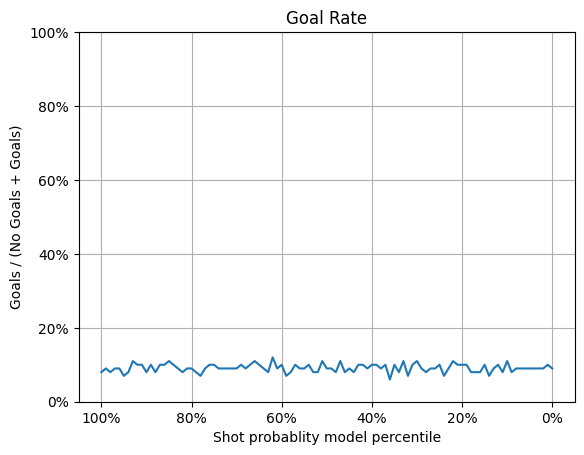

In [5]:
def plot_goal_shot_rate(data):
    filter_df = data[['angle', 'is_goal']]
    filter_df = filter_df.dropna()
    
    df_x = filter_df["angle"].values
    df_y = filter_df["is_goal"].values

    x_train, x_val, y_train, y_val = train_test_split(df_x, df_y, test_size=0.2, stratify=df_y, 
                                                          random_state=42)
    x_train = x_train.reshape(-1, 1)
    x_val = x_val.reshape(-1, 1)
    testy = y_val
    ns_probs = [0 for _ in range(len(y_val))]

    goal_prob = np.array([np.random.uniform(low=0.0, high=1.0) for i in range(x_val.shape[0])])
    
    df = pd.DataFrame(y_val, columns=["is_goal"])
    df["probablity_of_goal"] = goal_prob
    
    df['percentile_of_goal'] = round(df["probablity_of_goal"].rank(pct = True)*100)
    goal_rate = round((df.groupby(by='percentile_of_goal').sum() / 
                       df.groupby(by='percentile_of_goal').count())*100)
    goal_rate['percentile'] = goal_rate.index

    graph, (plt1) = plt.subplots(1, 1)
    plt1.plot(goal_rate["percentile"], goal_rate["is_goal"], label='Logistic Regression')
    plt1.set_ylim(0,100)
    plt1.xaxis.set_major_formatter('{x:1.0f}%')
    plt1.yaxis.set_major_formatter('{x:1.0f}%')
    plt1.invert_xaxis()
    plt1.set_xlabel('Shot probablity model percentile')
    plt1.set_ylabel('Goals / (No Goals + Goals)')
    plt.grid()
    plt.title("Goal Rate")
    plt.show()


data = pd.read_csv("../data/trainvaldata/train_set.csv")

plot_goal_shot_rate(data)

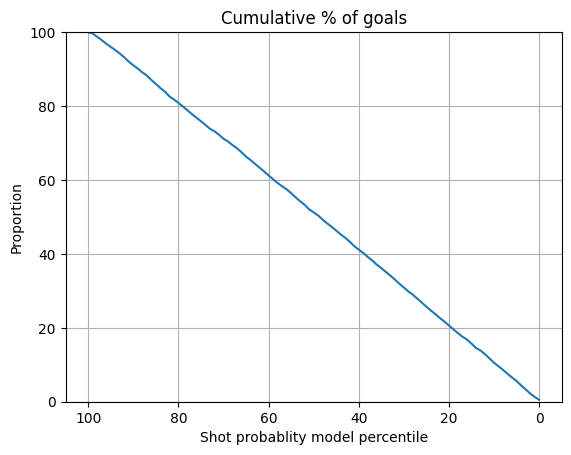

In [6]:
def plot_cumulative_goal(data):
    filter_df = data[['angle', 'is_goal']]
    filter_df = filter_df.dropna()
    
    df_x = filter_df["angle"].values
    df_y = filter_df["is_goal"].values

    x_train, x_val, y_train, y_val = train_test_split(df_x, df_y, test_size=0.2, stratify=df_y, 
                                                          random_state=42)
    x_train = x_train.reshape(-1, 1)
    x_val = x_val.reshape(-1, 1)
    testy = y_val
    ns_probs = [0 for _ in range(len(y_val))]

    goal_prob = np.array([np.random.uniform(low=0.0, high=1.0) for i in range(x_val.shape[0])])
    
    df = pd.DataFrame(y_val, columns=["is_goal"])
    df["probablity_of_goal"] = goal_prob
    
    df['percentile_of_goal'] = round(df["probablity_of_goal"].rank(pct = True)*100)
    goal_rate = df.groupby(by='percentile_of_goal').sum()
    goal_rate['percentile'] = goal_rate.index
    
    goal_rate['cum_sum'] = goal_rate['is_goal'].cumsum()
    goal_rate['cum_perc'] = 100*goal_rate['cum_sum'] / goal_rate['is_goal'].sum()


    graph, (plt1) = plt.subplots(1, 1)
    plt1.plot(goal_rate["percentile"], goal_rate["cum_perc"], label='Logistic Regression')
    plt1.set_ylim(0,100)
    plt1.invert_xaxis()
    plt1.set_xlabel('Shot probablity model percentile')
    plt1.set_ylabel('Proportion')
    plt.grid()
    plt.title("Cumulative % of goals")
    plt.show()


data = pd.read_csv("../data/trainvaldata/train_set.csv")

plot_cumulative_goal(data)

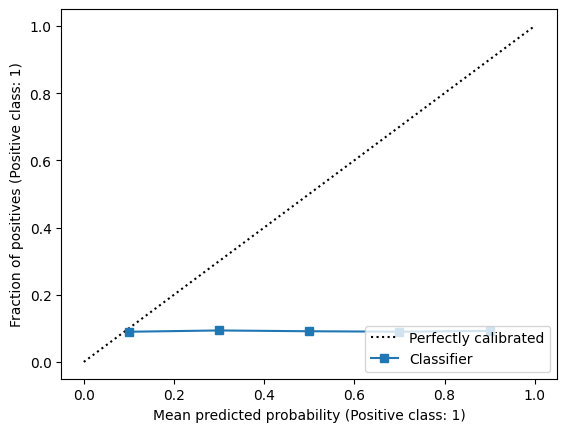

In [7]:
def create_extimator_plot(data):
    filter_df = data[['angle', 'is_goal']]
    filter_df = filter_df.dropna()
    
    df_x = filter_df["angle"].values
    df_y = filter_df["is_goal"].values

    x_train, x_val, y_train, y_val = train_test_split(df_x, df_y, test_size=0.2, stratify=df_y, 
                                                          random_state=42)
    x_train = x_train.reshape(-1, 1)
    x_val = x_val.reshape(-1, 1)
    testy = y_val
    ns_probs = [0 for _ in range(len(y_val))]

    goal_prob = np.array([np.random.uniform(low=0.0, high=1.0) for i in range(x_val.shape[0])])
    
    disp = CalibrationDisplay.from_predictions(y_val, goal_prob)
    plt.show()

    
data = pd.read_csv("../data/trainvaldata/train_set.csv")
create_extimator_plot(data)
    